In [80]:
class ball:
    
    def __init__(self,x,y,z,r) -> None:
        self.x=x
        self.y=y
        self.z=z
        self.r=r
class point:
    def __init__(self,x,y,z) -> None:
        self.x=x
        self.y=y
        self.z=z
import numpy as np #导入numpy库
cells = np.ones((1000,1000,1000),dtype='int') #新建三维数组，每维度为3,且初始值为1

ball_1=ball(50,50,50,5)
#创建装球的列表
balls=[]
balls.append(ball_1)
number=0
number2=0

In [81]:

#画两个坐标点之间点，y和z是一样的
def line(x,y,z,cells,ball):
    for i in range(x):
        cells[i+ball.x][y+ball.y][z+ball.z]=99
        cells[-i+ball.x][y+ball.y][z+ball.z]=99
        print(i+ball.x,y+ball.y,z+ball.z)
        global number
        number+=2

In [82]:
#圆盘算法,要画两个圆
#r就是x,z就是
#第一个参数是小球，第二个参数是网格，第三个参数是z轴，此处指半径
def disk(ball,celss,r,z):
    #得到相对x,y,z的差值
    # 1.先画一个初始点,其坐标为(0,0,r)
    #cells[0][0][z]=99
    x=0
    yr=r
    # 2.计算决策参数的初始值
    p=5/4-r
    #for i in range(int(r/2)+1):  #r向上取整
    while(yr>=x):  
        
        if(p<0):
            p=p+2*x+3
        else:
            p=p+2*(x-yr)+5
            yr-=1
        #画点函数：
        #北半球
        line(x,yr,z,cells,ball)
        line(yr,x,z,cells,ball)

        line(x,-yr,z,cells,ball)
        line(yr,-x,z,cells,ball)

        #南半球
        line(x,yr,-z,cells,ball)
        line(yr,x,-z,cells,ball)

        line(x,-yr,-z,cells,ball)
        line(yr,-x,-z,cells,ball)
        x+=1
       

In [83]:
#第一个参数是一个球，第二个参数是小网格
def circle(ball,cells):
    #1.先执行中点圆算法，得到，x和z
    #----------------------------------------------------
    r=ball.r
    x=0
    yr=r
    # 2.计算决策参数的初始值
    
    p=5/4-r
    #for i in range(int(r/2)+1):  #r向上取整
    while(yr>=x):  
        
        if(p<0):
            p=p+2*x+3
        else:
            p=p+2*(x-yr)+5
            yr-=1
        #2.用x和z执行两次圆盘算法
        disk(ball,cells,x,yr)

        disk(ball,cells,yr,x)
        x+=1
    #----------------------------------------------------
    #每次圆盘算法，可生成两个圆盘
    #圆盘算法先用x作为半径，生成两个圆盘

    #再用z作为半径，生成两个圆盘

    print("hel")
    

In [84]:

for i in balls:
    #第一层中点圆算法， 进入两个个圆盘算法：,假设y不变
    
    circle(i,cells)

    #第二层中点圆算法：
print(cells)

50 50 50
51 50 50
52 50 50
53 50 50
54 50 50
50 50 50
51 50 50
52 50 50
53 50 50
54 50 50
50 50 50
51 50 50
52 50 50
53 50 50
54 50 50
50 50 50
51 50 50
52 50 50
53 50 50
54 50 50
50 55 50
50 51 50
51 51 50
52 51 50
53 51 50
54 51 50
50 45 50
50 49 50
51 49 50
52 49 50
53 49 50
54 49 50
50 55 50
50 51 50
51 51 50
52 51 50
53 51 50
54 51 50
50 45 50
50 49 50
51 49 50
52 49 50
53 49 50
54 49 50
50 54 50
51 54 50
50 52 50
51 52 50
52 52 50
53 52 50
50 46 50
51 46 50
50 48 50
51 48 50
52 48 50
53 48 50
50 54 50
51 54 50
50 52 50
51 52 50
52 52 50
53 52 50
50 46 50
51 46 50
50 48 50
51 48 50
52 48 50
53 48 50
50 53 50
51 53 50
52 53 50
50 53 50
51 53 50
52 53 50
50 47 50
51 47 50
52 47 50
50 47 50
51 47 50
52 47 50
50 53 50
51 53 50
52 53 50
50 53 50
51 53 50
52 53 50
50 47 50
51 47 50
52 47 50
50 47 50
51 47 50
52 47 50
50 50 51
51 50 51
52 50 51
53 50 51
54 50 51
50 50 51
51 50 51
52 50 51
53 50 51
54 50 51
50 50 49
51 50 49
52 50 49
53 50 49
54 50 49
50 50 49
51 50 49
52 50 49
53 50 49
5

In [85]:
# 遍历
ii=[]
jj=[]
kk=[]
for i in range(0,100):
    for j in range(0,100):
        for k in range(0,100):
            if(cells[i][j][k]==99):
                ii.append(i)
                jj.append(j)
                kk.append(k)
                number2+=1
            

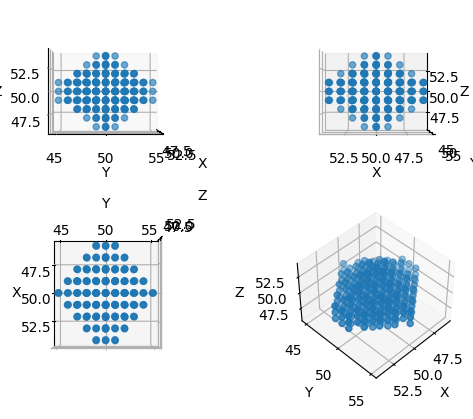

279
688
523.5987755982989
279


In [86]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
# 创建一个3维数组
#array_3d = np.random.rand(10, 10, 10) * 100
 
# 创建一个新的图像
fig = plt.figure()
def ppp(fig,ii,jj,kk,pos,elev,azim):
    ax = fig.add_subplot(pos, projection='3d')
    ax.scatter(ii, jj, kk)      
    #ax.scatter(100, 100, 100)   
    # 使用scatter方法绘制点
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z') 
    ax.view_init(elev,azim)

#正试图
ppp(fig,ii,jj,kk,221,0,0)
#俯视图
ppp(fig,ii,jj,kk,222,0,90)
#俯视图
ppp(fig,ii,jj,kk,223,90,0)
#45度角视图
ppp(fig,ii,jj,kk,224,45,45)


plt.show()  
      
print(len(ii))
print(number)
import math
print(math.pi*4/3*ball_1.r*ball_1.r*ball_1.r)
print(number2)

In [87]:
temp=1.0
porosity=1-(temp/100/100/100)
print(porosity)




0.999999
